# Library installation

In [1]:
import pandas as pd
import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns

In [ ]:
import os

# Data pull

In [ ]:
#from google.colab import drive 
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!ls

drive  sample_data


In [ ]:
#os.listdir('/content/drive/MyDrive/Hackathon_nov22')

['ecommerce_train.csv', 'ecommerce_test.csv']

In [ ]:
#os.chdir('/content/drive/MyDrive/Hackathon_nov22')

In [2]:
df_dev = pd.read_csv('ecommerce_train.csv')

In [3]:
df_test = pd.read_csv('ecommerce_test.csv')

In [4]:
print("Number of records in Train : ",df_dev.shape[0])
print("Number of features in Train : ",df_dev.shape[1])

Number of records in Train :  40000
Number of features in Train :  19


In [5]:
print("Number of records in Test : ",df_test.shape[0])
print("Number of features in Test : ",df_test.shape[1])

Number of records in Test :  10000
Number of features in Test :  18


In [6]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   session_id               40000 non-null  int64  
 1   administrative           40000 non-null  int64  
 2   administrative_duration  40000 non-null  float64
 3   informational            40000 non-null  int64  
 4   informational_duration   40000 non-null  float64
 5   productrelated           40000 non-null  int64  
 6   productrelated_duration  40000 non-null  float64
 7   bouncerates              40000 non-null  float64
 8   exitrates                40000 non-null  float64
 9   pagevalues               40000 non-null  float64
 10  specialday               40000 non-null  float64
 11  month                    40000 non-null  object 
 12  operatingsystems         40000 non-null  object 
 13  browser                  40000 non-null  object 
 14  region                

# Exploratory Data Analysis 

In [7]:
df_dev.drop('session_id',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
administrative,40000.0,2.544150,3.667252,0.0,0.000000,1.000000,4.000000,22.000000
administrative_duration,40000.0,89.794383,182.964645,0.0,0.000000,11.200000,110.154167,1946.000000
informational,40000.0,0.555225,1.332627,0.0,0.000000,0.000000,0.000000,11.000000
informational_duration,40000.0,40.977236,153.114387,0.0,0.000000,0.000000,0.000000,1767.666667
productrelated,40000.0,34.026975,46.798102,0.0,7.000000,19.000000,41.000000,440.000000
productrelated_duration,40000.0,1148.105672,1666.181462,0.0,183.883333,560.075000,1420.536667,18504.126210
bouncerates,40000.0,0.021969,0.048533,0.0,0.000000,0.003304,0.016667,0.200000
exitrates,40000.0,0.042307,0.048633,0.0,0.013389,0.025000,0.050000,0.200000
pagevalues,40000.0,6.494963,17.710646,0.0,0.000000,0.000000,0.000000,226.677702
specialday,40000.0,0.063553,0.199463,0.0,0.000000,0.000000,0.000000,1.000000


##### *Separate categorical and numeric columns*

In [8]:
# isolating the continuous variables 
num_var_list = list(df_dev.drop(['session_id'],axis=1).select_dtypes(exclude=['object']).drop(['revenue'],axis = 1).columns.values)
num_var_list

['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday',
 'region',
 'weekend']

In [9]:
# isolating the categorical variables 
cat_var_list = list(df_dev.drop(['session_id'],axis=1).select_dtypes(include=['object']).columns.values)
cat_var_list


['month', 'operatingsystems', 'browser', 'traffictype', 'visitortype']

In [10]:
#Weekend is a boolean format data, it will be converted to one hot encoded var later

## *Numeric features EDA*

##### *Histogram*

array([[<AxesSubplot:title={'center':'administrative'}>,
        <AxesSubplot:title={'center':'administrative_duration'}>,
        <AxesSubplot:title={'center':'informational'}>],
       [<AxesSubplot:title={'center':'informational_duration'}>,
        <AxesSubplot:title={'center':'productrelated'}>,
        <AxesSubplot:title={'center':'productrelated_duration'}>],
       [<AxesSubplot:title={'center':'bouncerates'}>,
        <AxesSubplot:title={'center':'exitrates'}>,
        <AxesSubplot:title={'center':'pagevalues'}>],
       [<AxesSubplot:title={'center':'specialday'}>,
        <AxesSubplot:title={'center':'region'}>, <AxesSubplot:>]],
      dtype=object)

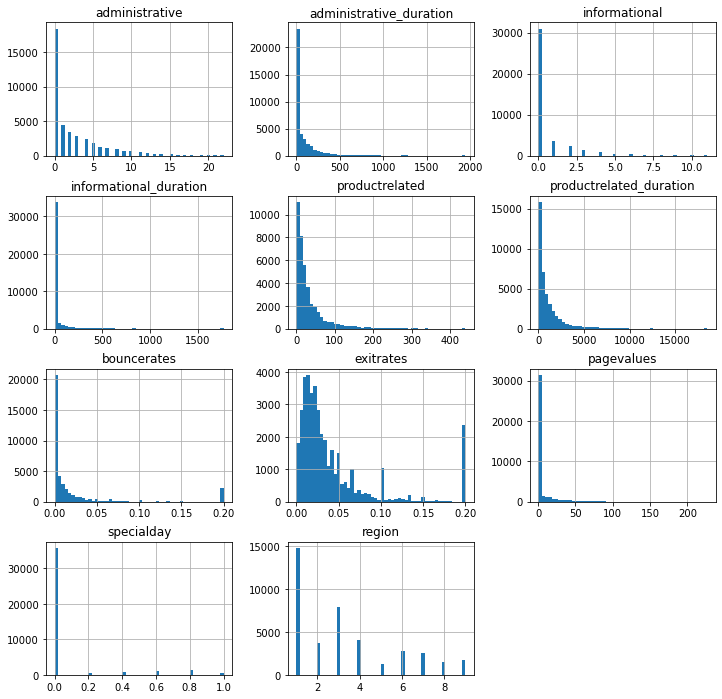

In [11]:
df_dev[num_var_list].hist(bins=50, figsize=(12,12))

In [12]:
## Region has to be a categorical variable.. to be converted later
df_dev.region.value_counts()

1    14749
3     7833
4     4046
2     3642
6     2755
7     2523
9     1762
8     1488
5     1202
Name: region, dtype: int64

In [13]:
## Weekend is in boolean format.. TO be converted to OHE later
df_dev.weekend.value_counts()

False    31053
True      8947
Name: weekend, dtype: int64

##### *Correlation Matrix within numeric variables* 

In [14]:
ecom_corr_matrix = df_dev.drop(['session_id','revenue'],axis=1).corr()

In [15]:
ecom_corr_matrix

# The duration variables are having high correlations (~60%) with the number of hits in respective pages
# Bounce rates and exit rates are correlated

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,region,weekend
administrative,1.000000,0.584529,0.391087,0.274090,0.448662,0.404032,-0.216590,-0.305020,0.111897,-0.113679,0.000507,0.013816
administrative_duration,0.584529,1.000000,0.280617,0.199530,0.294955,0.295905,-0.151642,-0.211213,0.078031,-0.085400,0.000327,0.017291
informational,0.391087,0.280617,1.000000,0.580722,0.377596,0.382680,-0.114288,-0.164321,0.081242,-0.063980,-0.023207,0.017216
informational_duration,0.274090,0.199530,0.580722,1.000000,0.271295,0.281936,-0.075931,-0.108674,0.058064,-0.036898,-0.012577,0.015120
productrelated,0.448662,0.294955,0.377596,0.271295,1.000000,0.750972,-0.202601,-0.294378,0.079132,-0.047809,-0.012477,-0.012593
productrelated_duration,0.404032,0.295905,0.382680,0.281936,0.750972,1.000000,-0.200532,-0.282332,0.086422,-0.048580,-0.016108,-0.008661
bouncerates,-0.216590,-0.151642,-0.114288,-0.075931,-0.202601,-0.200532,1.000000,0.893595,-0.128633,0.066774,-0.011816,-0.048048
exitrates,-0.305020,-0.211213,-0.164321,-0.108674,-0.294378,-0.282332,0.893595,1.000000,-0.171443,0.089374,-0.010686,-0.058484
pagevalues,0.111897,0.078031,0.081242,0.058064,0.079132,0.086422,-0.128633,-0.171443,1.000000,-0.058967,-0.004583,0.009022
specialday,-0.113679,-0.085400,-0.063980,-0.036898,-0.047809,-0.048580,0.066774,0.089374,-0.058967,1.000000,-0.013882,-0.049480


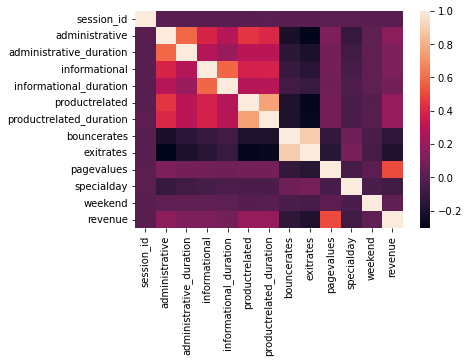

In [154]:
# plotting correlation heatmap
dataplot=sns.heatmap(df_dev.corr())

# displaying heatmap
plt.show()

##### *Distribution and box plots*

In [16]:
def cont_plots(data, col, target):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    sns.distplot(data[col], ax=axes[0],kde_kws={'bw':0.15}).set_title("Distribution plot")
    sns.boxplot(x=target, y=col, data=data).set_title("Box Plot distribution")
    plt.show()

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


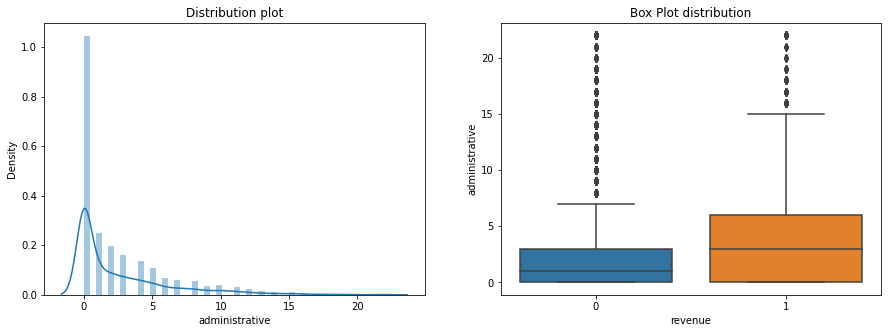

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


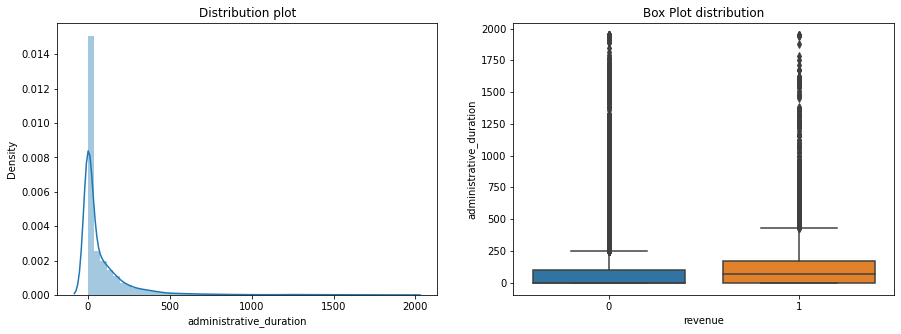

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


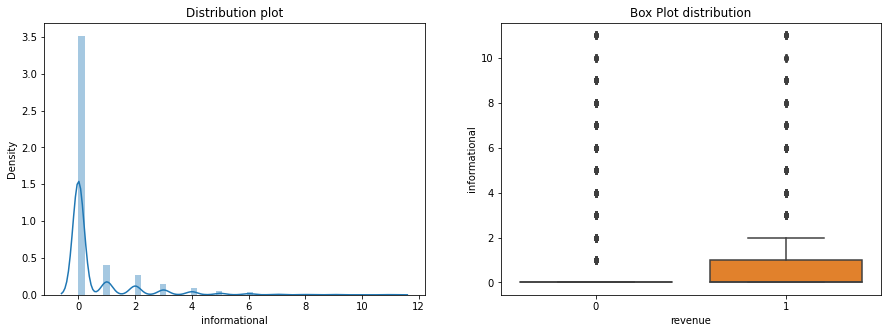

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


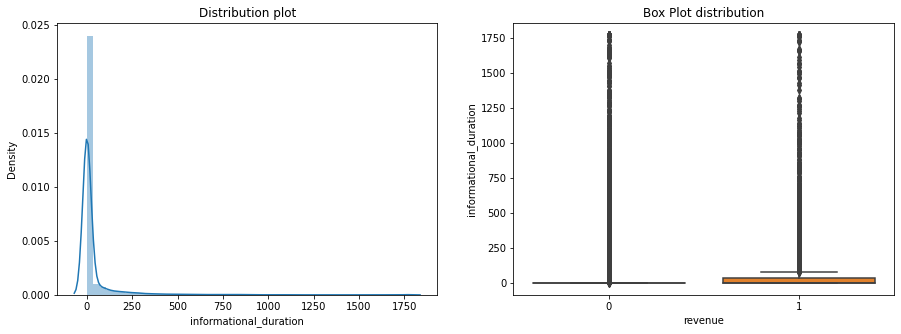

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


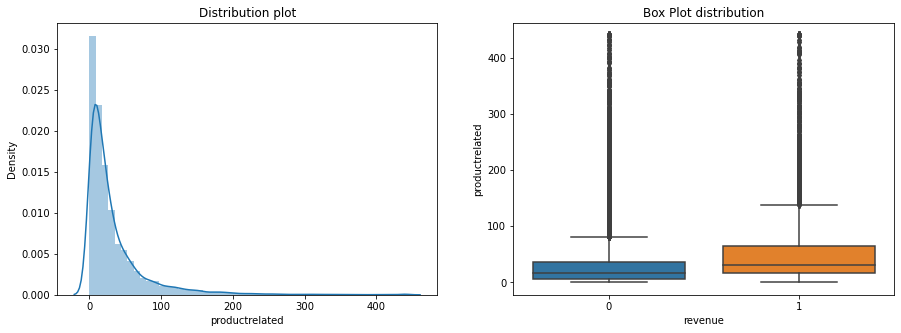

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


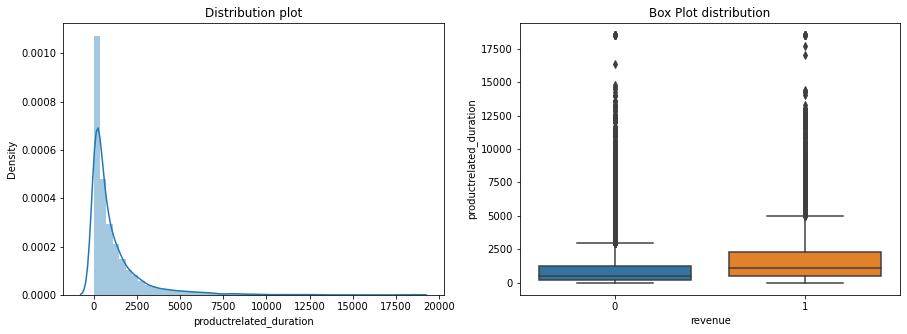

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


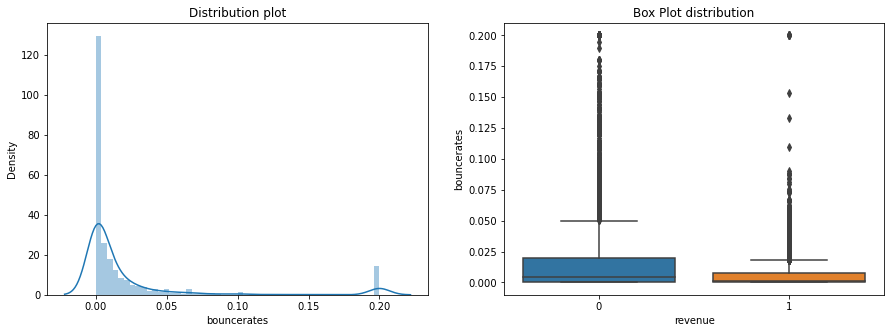

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


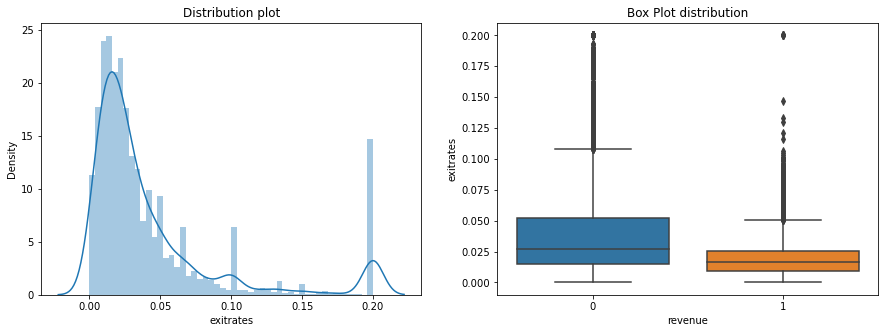

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


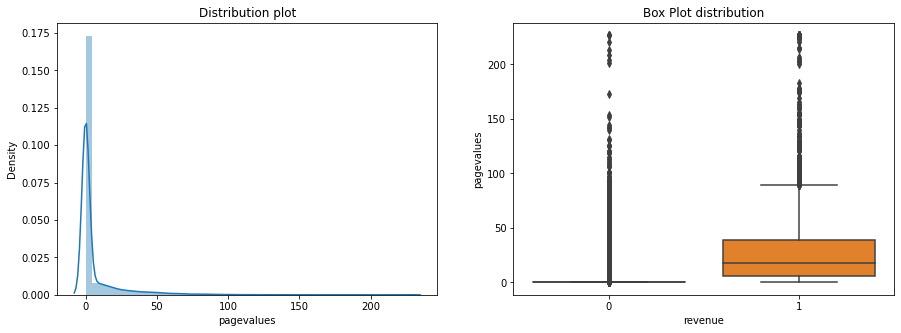

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


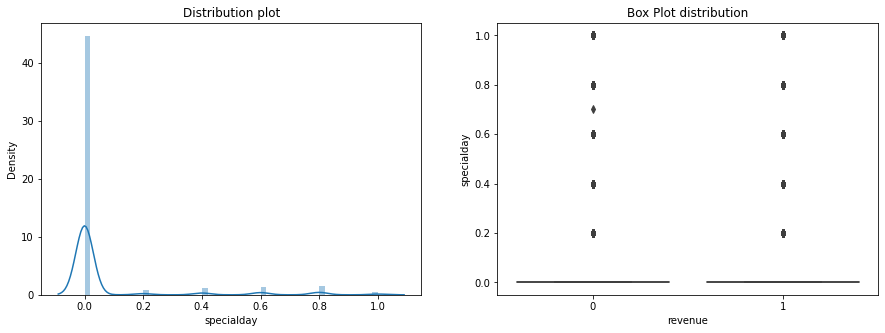

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


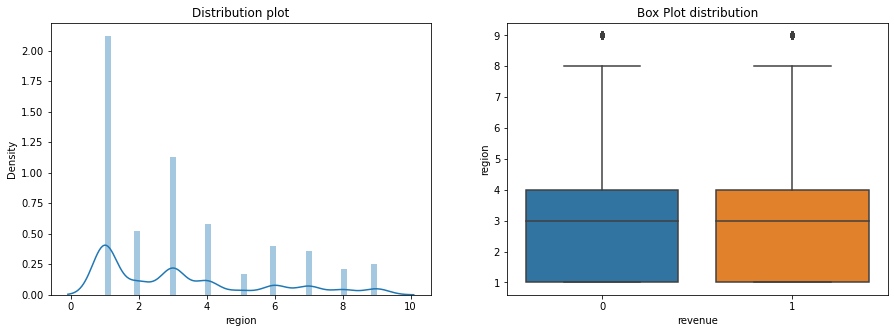

In [17]:
for cl in num_var_list:
  if cl != 'weekend':
    cont_plots(df_dev, cl, "revenue")

## *Categorical variable EDA*

##### *Bar plots*

In [18]:
def cat_plots(idat, col, target = "revenue"):
    print("Countplot for ",col, " split by ", target)
    print("\n")
    plt.figure(figsize=(15, 5))
    sns.countplot(x=col, data=idat, hue=target)
    plt.show()

Countplot for  month  split by  revenue




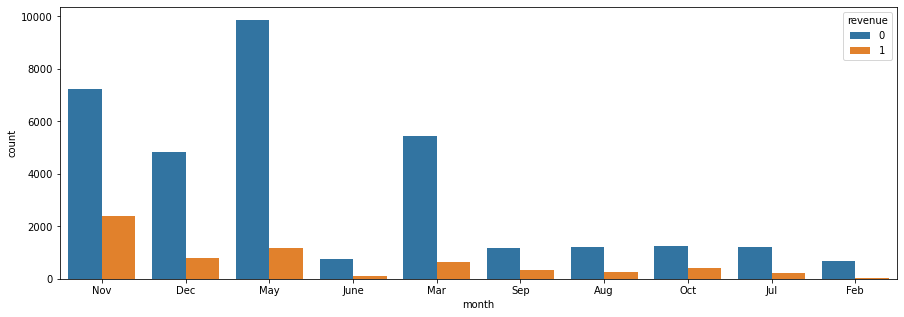

Countplot for  operatingsystems  split by  revenue




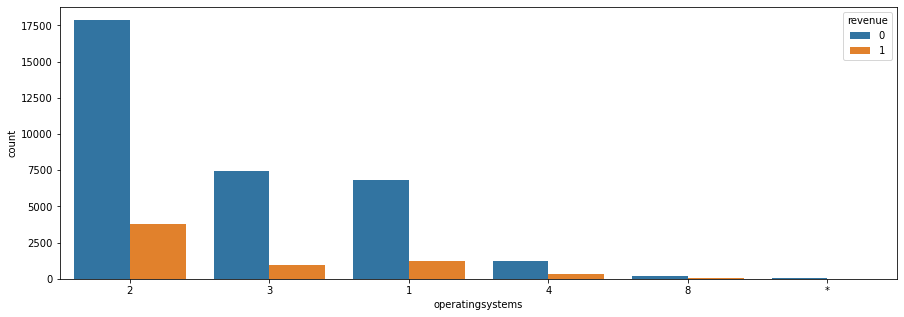

Countplot for  browser  split by  revenue




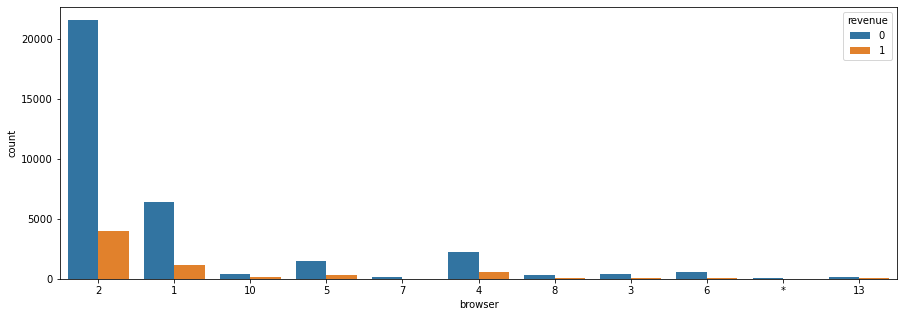

Countplot for  traffictype  split by  revenue




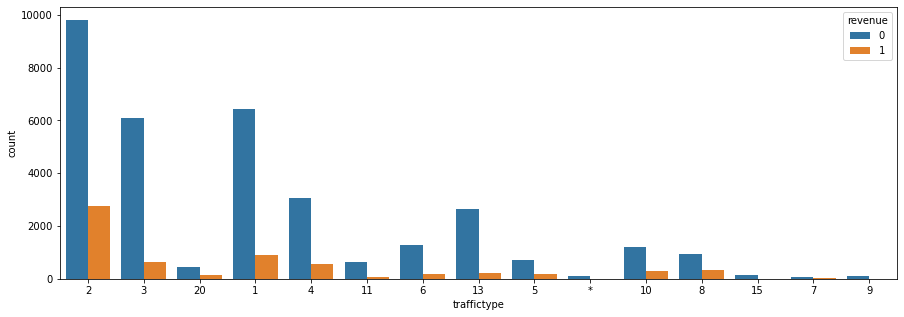

Countplot for  visitortype  split by  revenue




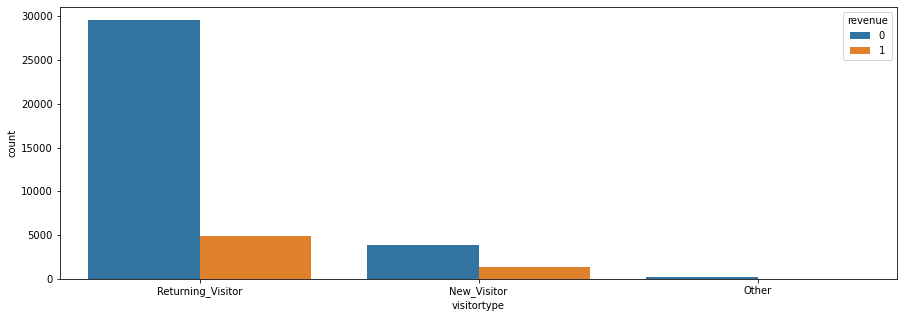

In [19]:
for cl in cat_var_list:
    cat_plots(df_dev,cl,"revenue")

# Data Preparation

In [20]:
# 1. Conversion of variable types - weekend, region
# 2. OHE - categorical
# 3. Outlier treatment - numeric 
# 4. Standardscaler - numeric

##  *Type conversion*

In [66]:
# Convert weekend to numeric

In [67]:
df_dev["weekend"] = df_dev["weekend"].astype(int)

In [68]:
df_dev["weekend"].value_counts()

0    31053
1     8947
Name: weekend, dtype: int64

In [69]:
# convert region to categorical

In [70]:
df_dev['region'].value_counts()

1    14749
3     7833
4     4046
2     3642
6     2755
7     2523
9     1762
8     1488
5     1202
Name: region, dtype: int64

In [71]:
df_dev['region'] = df_dev['region'].astype('O')

In [72]:
df_dev.dtypes

session_id                   int64
administrative               int64
administrative_duration    float64
informational                int64
informational_duration     float64
productrelated               int64
productrelated_duration    float64
bouncerates                float64
exitrates                  float64
pagevalues                 float64
specialday                 float64
month                       object
operatingsystems            object
browser                     object
region                      object
traffictype                 object
visitortype                 object
weekend                      int32
revenue                      int64
operatingsystems_2          object
browser_2                   object
traffictype_2               object
dtype: object

In [73]:
df_dev.head()

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,...,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue,operatingsystems_2,browser_2,traffictype_2
0,139957,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,...,2,2,3,2,Returning_Visitor,0,0,2,2,2
1,496587,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,...,3,2,6,3,Returning_Visitor,0,0,3,2,3
2,440268,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,...,2,2,1,20,Returning_Visitor,0,0,2,2,Others
3,294672,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,...,2,2,1,2,Returning_Visitor,1,1,2,2,2
4,497475,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,...,3,2,5,2,Returning_Visitor,0,0,3,2,2


##### *One hot encoding*

In [74]:
month = pd.get_dummies(df_dev['month'],prefix='month',drop_first=True)
full_data_dev = pd.concat([df_dev,month],axis=1)


In [75]:
## For Operatingsystems - we observe that categories 4,8,* contribute to <5% of the datapoints.. 
## So we will club those together as Others

In [76]:
df_dev.operatingsystems.value_counts()/df_dev.operatingsystems.count()

2    0.540950
3    0.210975
1    0.202600
4    0.037450
8    0.005900
*    0.002125
Name: operatingsystems, dtype: float64

In [77]:
df_dev['operatingsystems_2'] = np.where(df_dev['operatingsystems'].isin(['4','8','*']),'Others',df_dev['operatingsystems'])

In [78]:
df_dev['operatingsystems_2'].value_counts()

2         21638
3          8439
1          8104
Others     1819
Name: operatingsystems_2, dtype: int64

In [79]:
OS = pd.get_dummies(df_dev['operatingsystems_2'],prefix='OS',drop_first=False)
full_data_dev = pd.concat([full_data_dev,OS],axis=1)


In [80]:
## Dropping one of the OHE columns 
full_data_dev.drop('OS_Others',axis=1,inplace=True)

In [81]:
## For Browser - we observe that categories 1,2,4,5 contribute to ~95% of the datapoints.. 
## So we will club the rest together as Others

In [82]:
df_dev['browser'].value_counts()/df_dev['browser'].count()

2     0.638500
1     0.188925
4     0.069575
5     0.043075
6     0.015400
10    0.014100
3     0.010300
8     0.009800
13    0.004950
7     0.004125
*     0.001250
Name: browser, dtype: float64

In [83]:
df_dev['browser_2'] = np.where(~df_dev['browser'].isin(['1','2','4','5']),'Others',df_dev['browser'])

In [84]:
df_dev['browser_2'].value_counts()

2         25540
1          7557
4          2783
Others     2397
5          1723
Name: browser_2, dtype: int64

In [85]:
browser = pd.get_dummies(df_dev['browser_2'],prefix='browser',drop_first=False)
full_data_dev = pd.concat([full_data_dev,browser],axis=1)
full_data_dev.drop('browser_Others',axis=1,inplace=True)


In [86]:
full_data_dev.head(2)

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,...,month_Nov,month_Oct,month_Sep,OS_1,OS_2,OS_3,browser_1,browser_2,browser_4,browser_5
0,139957,2,47.5,0,0.0,19,1203.480714,0.0,0.027421,6.748509,...,1,0,0,0,1,0,0,1,0,0
1,496587,0,0.0,0,0.0,7,152.000000,0.0,0.033333,0.000000,...,0,0,0,0,0,1,0,1,0,0


In [87]:
region = pd.get_dummies(df_dev['region'],prefix='region',drop_first=True)
full_data_dev = pd.concat([full_data_dev,region],axis=1)

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [88]:
## For Traffic type - we observe that categories 11,20,15,*,7,9 contribute to <5% of the datapoints.. 
## So we will club those together as Others

In [89]:
df_dev['traffictype'].value_counts()/df_dev['traffictype'].count()

2     0.313625
1     0.183075
3     0.168825
4     0.090550
13    0.071500
10    0.037750
6     0.036425
8     0.031750
5     0.021850
11    0.018200
20    0.014075
15    0.003675
9     0.003100
*     0.003000
7     0.002600
Name: traffictype, dtype: float64

In [90]:
df_dev['traffictype_2'] = np.where(df_dev['traffictype'].isin(['11','15','7','9','20','*']),'Others',df_dev['traffictype'])

In [91]:
traffictype = pd.get_dummies(df_dev['traffictype_2'],prefix='traffictype',drop_first=False)
full_data_dev = pd.concat([full_data_dev,traffictype],axis=1)
full_data_dev.drop('traffictype_Others',axis=1,inplace=True)


In [92]:
visitortype = pd.get_dummies(df_dev['visitortype'],prefix='visitortype',drop_first=False)
full_data_dev = pd.concat([full_data_dev,visitortype],axis=1)
full_data_dev.drop('visitortype_Other',axis=1,inplace=True)


In [93]:
full_data_dev.columns

Index(['session_id', 'administrative', 'administrative_duration',
       'informational', 'informational_duration', 'productrelated',
       'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues',
       'specialday', 'month', 'operatingsystems', 'browser', 'region',
       'traffictype', 'visitortype', 'weekend', 'revenue',
       'operatingsystems_2', 'browser_2', 'traffictype_2', 'month_Dec',
       'month_Feb', 'month_Jul', 'month_June', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'OS_1', 'OS_2', 'OS_3',
       'browser_1', 'browser_2', 'browser_4', 'browser_5', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'traffictype_1', 'traffictype_10', 'traffictype_13',
       'traffictype_2', 'traffictype_3', 'traffictype_4', 'traffictype_5',
       'traffictype_6', 'traffictype_8', 'visitortype_New_Visitor',
       'visitortype_Returning_Visitor'],
      dtype='object')

In [94]:
# Removing One hot encoded raw variables

In [95]:
df_dev_2 = full_data_dev.drop(['month','operatingsystems','browser','region','traffictype','visitortype',
                   'operatingsystems_2', 'browser_2', 'traffictype_2'],axis=1)

In [96]:
df_dev_2.shape

(40000, 46)

In [97]:
df_dev_2.head()

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,...,traffictype_1,traffictype_10,traffictype_13,traffictype_3,traffictype_4,traffictype_5,traffictype_6,traffictype_8,visitortype_New_Visitor,visitortype_Returning_Visitor
0,139957,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,...,0,0,0,0,0,0,0,0,0,1
1,496587,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,...,0,0,0,1,0,0,0,0,0,1
2,440268,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,...,0,0,0,0,0,0,0,0,0,1
3,294672,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,...,0,0,0,0,0,0,0,0,0,1
4,497475,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,...,0,0,0,0,0,0,0,0,0,1


## *Outlier treatment for numeric vars*

In [98]:
full_data_2 =df_dev_2.copy()
for col in ['administrative', 'administrative_duration',
       'informational', 'informational_duration', 'productrelated',
       'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues']: 
    sorted(full_data_2[col])
    p1,p99 = np.percentile(full_data_2[col], [1, 99]) 
    lower_bound = p1
    upper_bound = p99

    full_data_2[col] = np.where(full_data_2[col] < lower_bound, lower_bound, full_data_2[col])
    full_data_2[col] = np.where(full_data_2[col] > upper_bound, upper_bound, full_data_2[col])

In [99]:
desc_2 = full_data_2.describe().T
desc_2

,count,mean,std,min,25%,50%,75%,max
session_id,40000.0,311469.372075,108498.432497,123460.000,217950.000000,311194.500000,404680.500000,499982.000000
administrative,40000.0,2.514700,3.547478,0.000,0.000000,1.000000,4.000000,15.000000
administrative_duration,40000.0,85.697041,155.410080,0.000,0.000000,11.200000,110.154167,910.705000
informational,40000.0,0.535325,1.222759,0.000,0.000000,0.000000,0.000000,6.000000
informational_duration,40000.0,37.032721,121.227814,0.000,0.000000,0.000000,0.000000,814.608390
productrelated,40000.0,33.178825,41.696011,1.000,7.000000,19.000000,41.000000,229.000000
productrelated_duration,40000.0,1122.846472,1512.190409,0.000,183.883333,560.075000,1420.536667,8168.789720
bouncerates,40000.0,0.021969,0.048533,0.000,0.000000,0.003304,0.016667,0.200000
exitrates,40000.0,0.042315,0.048626,0.001,0.013389,0.025000,0.050000,0.200000
pagevalues,40000.0,6.150048,15.261080,0.000,0.000000,0.000000,0.000000,82.407773


In [100]:
# To inspect the features with low variance
low_var_features = list(desc_2[desc_2['std']==0].index)

In [101]:
# by inspection there are no low varaince features
low_var_features

[]

## Standard scaler

In [102]:
feat_lst = ['administrative', 'administrative_duration',
       'informational', 'informational_duration', 'productrelated',
       'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues']

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
full_data_scaled_num = pd.DataFrame(scaler.fit_transform(full_data_2[feat_lst]), index=full_data_2.index, columns=feat_lst)

In [104]:
full_data_2.shape

(40000, 46)

In [105]:
full_data_2.head()

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,...,traffictype_1,traffictype_10,traffictype_13,traffictype_3,traffictype_4,traffictype_5,traffictype_6,traffictype_8,visitortype_New_Visitor,visitortype_Returning_Visitor
0,139957,2.0,47.500000,0.0,0.0,19.0,1203.480714,0.000000,0.027421,6.748509,...,0,0,0,0,0,0,0,0,0,1
1,496587,0.0,0.000000,0.0,0.0,7.0,152.000000,0.000000,0.033333,0.000000,...,0,0,0,1,0,0,0,0,0,1
2,440268,7.0,206.500000,1.0,389.9,95.0,4415.889952,0.000133,0.033750,2.676062,...,0,0,0,0,0,0,0,0,0,1
3,294672,1.0,18.258571,0.0,0.0,103.0,8168.789720,0.004871,0.034746,6.824908,...,0,0,0,0,0,0,0,0,0,1
4,497475,0.0,0.000000,0.0,0.0,42.0,1305.108333,0.016068,0.039742,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [106]:
full_data_scaled_num.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues
0,-0.145091,-0.245785,-0.437806,-0.305484,-0.340057,0.053323,-0.452663,-0.306305,0.039215
1,-0.708879,-0.551432,-0.437806,-0.305484,-0.627857,-0.642021,-0.452663,-0.184720,-0.402994
2,1.264379,0.777327,0.380026,2.910815,1.482683,2.177692,-0.449923,-0.176150,-0.227640
3,-0.426985,-0.433944,-0.437806,-0.305484,1.674550,4.659487,-0.352301,-0.155665,0.044222
4,-0.708879,-0.551432,-0.437806,-0.305484,0.211562,0.120530,-0.121583,-0.052919,-0.402994


In [107]:
full_data_dev_scaled = pd.concat([full_data_2.drop(feat_lst,axis=1),full_data_scaled_num],axis=1)

In [108]:
full_data_dev_scaled.shape

(40000, 46)

In [112]:
full_data_dev_scaled.to_csv('devdata_cleaned.csv',index=False)

#### Cleaning function for test data

In [113]:
def cleaner(data):

  data["weekend"] = data["weekend"].astype(int)
  month = pd.get_dummies(data['month'],prefix='month',drop_first=True)
  full_data = pd.concat([data,month],axis=1)
  data['operatingsystems_2'] = np.where(data['operatingsystems'].isin(['4','8','*']),'Others',data['operatingsystems'])
  OS = pd.get_dummies(data['operatingsystems_2'],prefix='OS',drop_first=False)
  full_data = pd.concat([full_data,OS],axis=1)

  ## Dropping one of the OHE columns 
  full_data.drop('OS_Others',axis=1,inplace=True)
  data['browser_2'] = np.where(~data['browser'].isin(['1','2','4','5']),'Others',data['browser'])
  browser = pd.get_dummies(data['browser_2'],prefix='browser',drop_first=False)
  full_data = pd.concat([full_data,browser],axis=1)
  full_data.drop('browser_Others',axis=1,inplace=True)

  region = pd.get_dummies(data['region'],prefix='region',drop_first=True)
  full_data = pd.concat([full_data,region],axis=1)
  data['traffictype_2'] = np.where(data['traffictype'].isin(['11','15','7','9','20','*']),'Others',data['traffictype'])
  traffictype = pd.get_dummies(data['traffictype_2'],prefix='traffictype',drop_first=False)
  full_data = pd.concat([full_data,traffictype],axis=1)
  full_data.drop('traffictype_Others',axis=1,inplace=True)

  visitortype = pd.get_dummies(data['visitortype'],prefix='visitortype',drop_first=False)
  full_data = pd.concat([full_data,visitortype],axis=1)
  full_data.drop('visitortype_Other',axis=1,inplace=True)

  data_2 = full_data.drop(['month','operatingsystems','browser','region','traffictype','visitortype',
                    'operatingsystems_2', 'browser_2', 'traffictype_2'],axis=1)


  full_data_2 =data_2.copy()
  for col in ['administrative', 'administrative_duration',
        'informational', 'informational_duration', 'productrelated',
        'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues']: 
      sorted(full_data_2[col])

      p1,p99 = np.percentile(full_data_2[col], [1, 99])

      lower_bound = p1
      upper_bound = p99

      full_data_2[col] = np.where(full_data_2[col] < lower_bound, lower_bound, full_data_2[col])
      full_data_2[col] = np.where(full_data_2[col] > upper_bound, upper_bound, full_data_2[col])

  feat_lst = ['administrative', 'administrative_duration',
        'informational', 'informational_duration', 'productrelated',
        'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues']
  scaler = StandardScaler()
  full_data_scaled_num = pd.DataFrame(scaler.fit_transform(full_data_2[feat_lst]), index=full_data_2.index, columns=feat_lst)
  full_data_scaled = pd.concat([full_data_2.drop(feat_lst,axis=1),full_data_scaled_num],axis=1)
  return full_data_scaled 

In [114]:
full_data_test = cleaner(df_test)

In [115]:
full_data_test.shape

(10000, 45)

In [116]:
full_data_test.head()

,session_id,specialday,weekend,month_Dec,month_Feb,month_Jul,month_June,month_Mar,month_May,month_Nov,...,visitortype_Returning_Visitor,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues
0,283149,0.0,0,0,0,0,0,0,0,1,...,0,-0.708754,-0.564273,-0.449361,-0.309094,-0.547837,-0.480691,-0.449666,-0.575489,-0.400099
1,253020,0.0,0,0,0,0,0,0,0,1,...,0,-0.708754,-0.564273,-0.449361,-0.309094,-0.386957,-0.639489,-0.079732,0.054019,-0.400099
2,348435,0.0,0,0,0,0,0,1,0,0,...,1,-0.708754,-0.564273,-0.449361,-0.309094,0.302531,0.357092,-0.020217,-0.324796,-0.400099
3,299763,0.0,1,0,0,0,0,0,0,1,...,1,-0.708754,-0.564273,0.365732,6.267626,-0.019230,-0.380193,-0.449666,-0.545868,-0.400099
4,195120,0.0,1,0,0,0,0,1,0,0,...,1,-0.708754,-0.564273,1.180826,-0.170986,-0.685735,-0.731561,3.728630,3.278091,-0.400099


In [117]:
full_data_test.to_csv('testdata_cleaned.csv',index=False)

# Modelling data prep

In [118]:
x_feats = list(full_data_dev_scaled.drop(['session_id','revenue'],axis=1).columns)
y_feats = ['revenue']

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,  y_test = train_test_split(full_data_dev_scaled[x_feats],full_data_dev_scaled[y_feats],test_size = 0.2, random_state=42 ,stratify = full_data_dev_scaled[y_feats])

In [120]:
print(y_train.mean())
print(y_test.mean())

revenue    0.158281
dtype: float64
revenue    0.15825
dtype: float64


# Modelling

# Logistic Regression Model

In [121]:
def roc_curve(fpr,tpr):
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import statsmodels.api as sm 

In [123]:
LG1 = LogisticRegression()
LG1.fit(x_train,y_train)


C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
pred_train_LG_1 = LG1.predict(x_train)
pred_test_LG_1 = LG1.predict(x_test)
pred_prob_train_LG_1 = LG1.predict_proba(x_train)[:1]
pred_prob_test_LG_1 = LG1.predict_proba(x_test)[:1]


In [125]:

accuracy_train_LG_1 = accuracy_score(pred_train_LG_1,y_train)
accuracy_test_LG_1 = accuracy_score(pred_test_LG_1,y_test)

In [126]:
confusion_LG_1_train = metrics.confusion_matrix( y_train, pred_train_LG_1 )
confusion_LG_1_train

array([[26154,   781],
       [ 3087,  1978]], dtype=int64)

In [127]:
confusion_LG_1_test = metrics.confusion_matrix( y_test, pred_test_LG_1 )
confusion_LG_1_test

array([[6523,  211],
       [ 813,  453]], dtype=int64)

In [128]:
accuracy_train_LG_1

0.879125

In [129]:
accuracy_test_LG_1

0.872

In [130]:
fpr_train_LG_1, tpr_train_LG_1, _ = metrics.roc_curve(np.array(y_train), LG1.predict_proba(x_train)[:,1])
auc_train_LG_1 = metrics.auc(fpr_train_LG_1,tpr_train_LG_1)

In [131]:
fpr_test_LG_1, tpr_test_LG_1, _ = metrics.roc_curve(np.array(y_test), LG1.predict_proba(x_test)[:,1])
auc_test_LG_1 = metrics.auc(fpr_test_LG_1,tpr_test_LG_1)

In [132]:
auc_train_LG_1

0.90204331989318

In [133]:
auc_test_LG_1

0.8914331366938002

In [134]:
print("Train accuracy {}".format(accuracy_train_LG_1))
print("Test accuracy is {}".format(accuracy_test_LG_1))

print('Train AUC is {}'.format(auc_train_LG_1))
print('Test AUC is {}'.format(auc_test_LG_1))

Train accuracy 0.879125
Test accuracy is 0.872
Train AUC is 0.90204331989318
Test AUC is 0.8914331366938002


ROC Curve for Train sample


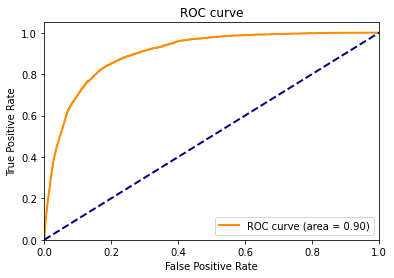

In [135]:
print("ROC Curve for Train sample")
roc_curve(fpr_train_LG_1,tpr_train_LG_1)

In [136]:
y_hat_hack_proba = LG1.predict_proba(full_data_test.drop('session_id',axis=1))[: ][: , 1]
hack_temp = full_data_test[['session_id']].copy()

In [137]:
hack_temp.reset_index(drop = True, inplace = True)

In [138]:
hack_probs = pd.concat([hack_temp, pd.DataFrame(y_hat_hack_proba)], axis = 1)

In [139]:
hack_probs.columns = ['session_id','probs']

In [140]:
hack_probs['revenue'] = np.where(hack_probs['probs']>0.5,1,0)

In [141]:
hack_probs['probs'].describe()

count    10000.000000
mean         0.158262
std          0.219796
min          0.001678
25%          0.038863
50%          0.072298
75%          0.162043
max          0.997723
Name: probs, dtype: float64

In [142]:
hack_probs.drop('probs',axis=1).to_csv('submission_1.csv',index=False)

In [143]:
hack_probs.drop('probs',axis=1).head()

,session_id,revenue
0,283149,0
1,253020,0
2,348435,0
3,299763,0
4,195120,0


In [144]:
hack_probs['revenue'].value_counts()

0    9131
1     869
Name: revenue, dtype: int64

# Decision Tree Model

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [151]:
dectree = DecisionTreeClassifier(random_state = 100)

In [152]:
params = {'max_depth':list(range(2,5)), 'criterion':['gini', 'entropy'],'min_samples_split' :[2,5,10],'min_samples_leaf':[2,4]}

In [153]:
cv_gs_dt = GridSearchCV(dectree, param_grid = params, cv = 5, scoring = 'accuracy')